# Data set from Selina

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('clomd.csv')

In [3]:
pd.options.display.max_columns = None  # display all columns
df = pd.read_csv('clomd.csv')
df.head(6500)

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,v_decile_score,two_year_recid,days_in_jail,days_in_custody
0,Male,67,Other,0,1,0,0,0,-1.0,1.0,F,1,0,0,7
1,Male,34,African-American,0,3,0,0,0,-1.0,1.0,F,1,1,10,10
2,Male,44,Other,0,1,0,0,0,0.0,0.0,M,1,0,1,1
3,Male,43,Other,0,4,0,0,3,-1.0,1.0,F,3,0,0,12
4,Male,41,African-American,0,4,0,0,0,-1.0,1.0,F,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,Male,58,Caucasian,0,3,0,0,2,-9.0,9.0,F,2,0,4,5
6158,Male,37,African-American,0,3,0,0,6,0.0,0.0,F,5,0,1,1
6159,Female,32,Caucasian,0,3,0,0,1,-1.0,1.0,M,1,1,0,1
6160,Female,43,Caucasian,0,2,0,0,0,-1.0,1.0,M,1,1,1,1


# Tables

In [4]:
# Display the columns
column_names = df.columns.tolist()
column_names

['sex',
 'age',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_days_from_compas',
 'c_charge_degree',
 'v_decile_score',
 'two_year_recid',
 'days_in_jail',
 'days_in_custody']

In [5]:
from IPython.display import display, HTML

# Get column names
column_names = df.columns.tolist()

# Create a DataFrame with column names
column_frame = pd.DataFrame({'Columns': column_names})

# Set the display options for left-aligned text
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display the column names in a frame
display(HTML(column_frame.to_html(index=False)))

Columns
sex
age
race
juv_fel_count
decile_score
juv_misd_count
juv_other_count
priors_count
days_b_screening_arrest
c_days_from_compas


In [6]:
!pip install tabulate

In [7]:
from tabulate import tabulate

# Get the count of each category in the "race" column
race_counts = df['race'].value_counts()

# Create a DataFrame with the race categories and their counts
race_table = pd.DataFrame({'Race': race_counts.index, 'Count': race_counts.values})

# Sort the table by count in descending order
race_table = race_table.sort_values('Count', ascending=False)

# Display the race table
table = tabulate(race_table, headers='keys', tablefmt='fancy_grid')
print(table)

╒════╤══════════════════╤═════════╕
│    │ Race             │   Count │
╞════╪══════════════════╪═════════╡
│  0 │ African-American │    3174 │
├────┼──────────────────┼─────────┤
│  1 │ Caucasian        │    2095 │
├────┼──────────────────┼─────────┤
│  2 │ Hispanic         │     509 │
├────┼──────────────────┼─────────┤
│  3 │ Other            │     342 │
├────┼──────────────────┼─────────┤
│  4 │ Asian            │      31 │
├────┼──────────────────┼─────────┤
│  5 │ Native American  │      11 │
╘════╧══════════════════╧═════════╛


In [8]:
# Get the column names
column_names = df.columns.tolist()

# Create a table with the column names
table = tabulate([(col,) for col in column_names], headers=["Column Names"], tablefmt="fancy_grid")

# Print the table
print(table)

╒═════════════════════════╕
│ Column Names            │
╞═════════════════════════╡
│ sex                     │
├─────────────────────────┤
│ age                     │
├─────────────────────────┤
│ race                    │
├─────────────────────────┤
│ juv_fel_count           │
├─────────────────────────┤
│ decile_score            │
├─────────────────────────┤
│ juv_misd_count          │
├─────────────────────────┤
│ juv_other_count         │
├─────────────────────────┤
│ priors_count            │
├─────────────────────────┤
│ days_b_screening_arrest │
├─────────────────────────┤
│ c_days_from_compas      │
├─────────────────────────┤
│ c_charge_degree         │
├─────────────────────────┤
│ v_decile_score          │
├─────────────────────────┤
│ two_year_recid          │
├─────────────────────────┤
│ days_in_jail            │
├─────────────────────────┤
│ days_in_custody         │
╘═════════════════════════╛


# Distribution

In [9]:
import matplotlib.pyplot as plt

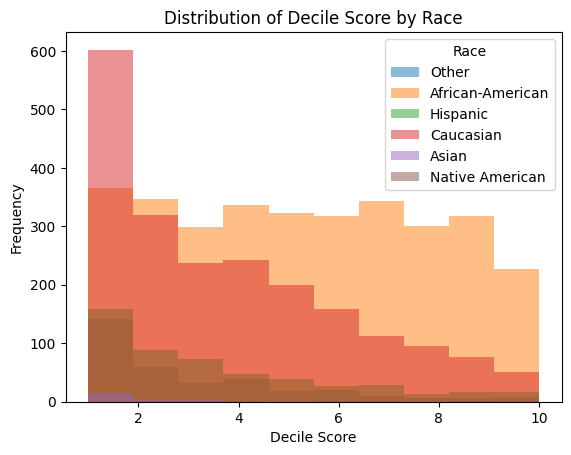

In [10]:
race_categories = df['race'].unique()  # Get the unique race categories
for race_category in race_categories:
    # Filter the data for the current race category
    filtered_data = df[df['race'] == race_category]
    
    # Plot the histogram for the decile score column
    plt.hist(filtered_data['decile_score'], bins=10, range=(1, 10), alpha=0.5, label=race_category)

# Add labels, title, and legend
plt.xlabel('Decile Score')
plt.ylabel('Frequency')
plt.title('Distribution of Decile Score by Race')
plt.legend(title='Race')

# Display the histograms
plt.show()

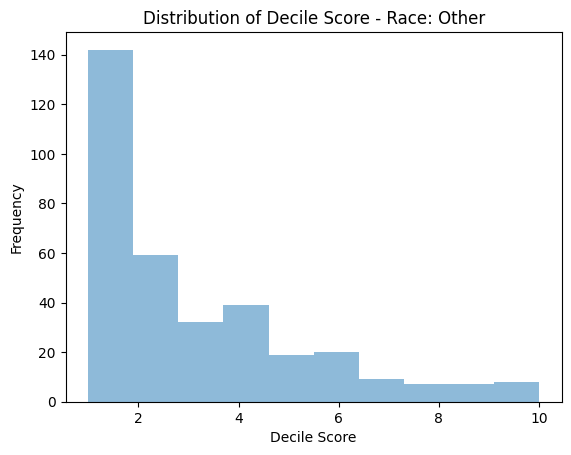

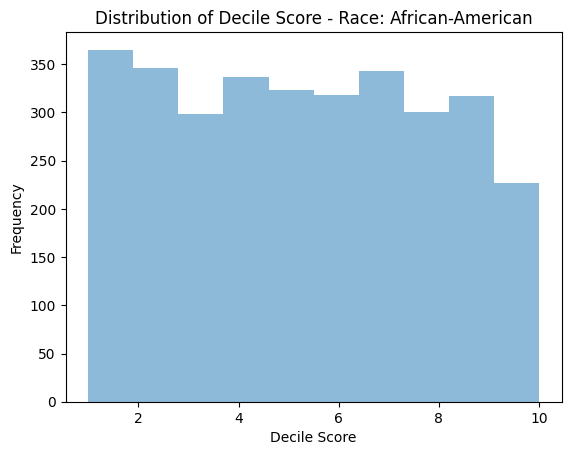

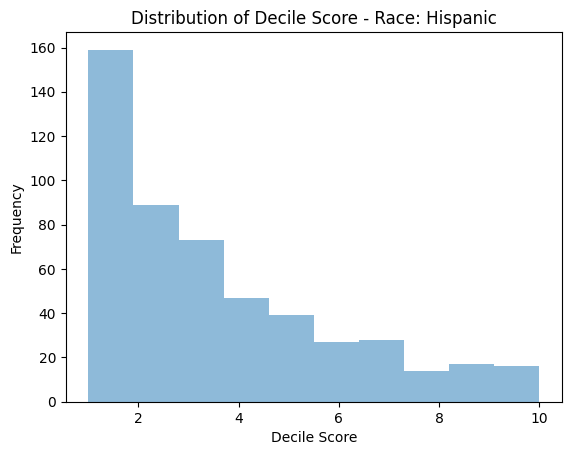

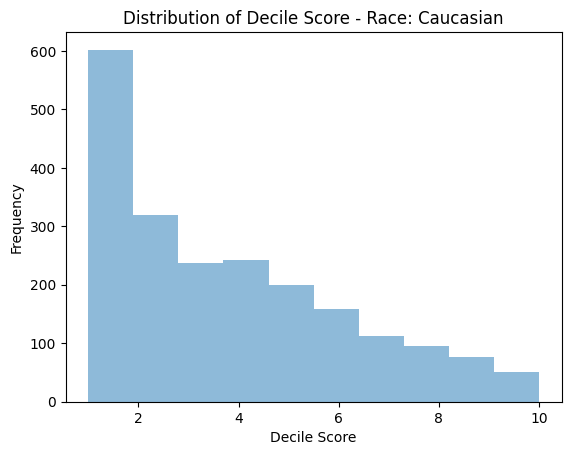

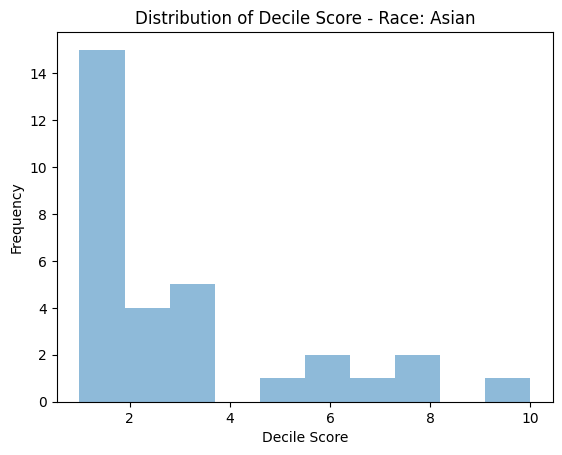

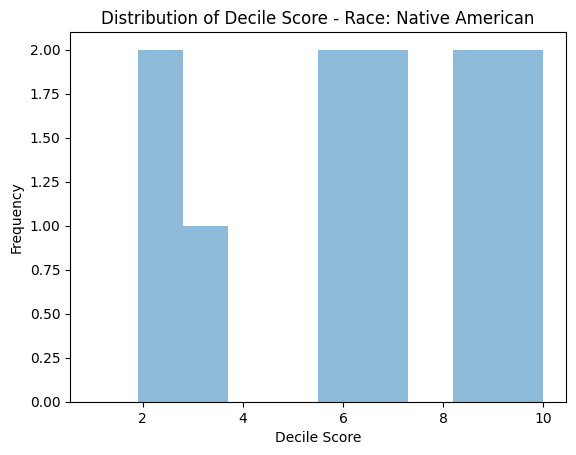

In [11]:
import matplotlib.pyplot as plt

race_categories = df['race'].unique()  # Get the unique race categories

# Create separate plots for each race category
for i, race_category in enumerate(race_categories, start=1):
    # Filter the data for the current race category
    filtered_data = df[df['race'] == race_category]
    
    # Create a new plot
    plt.figure(i)
    
    # Plot the histogram for the decile score column
    plt.hist(filtered_data['decile_score'], bins=10, range=(1, 10), alpha=0.5)
    
    # Add labels and title
    plt.xlabel('Decile Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Decile Score - Race: {race_category}')
    
# Display the plots
plt.show()


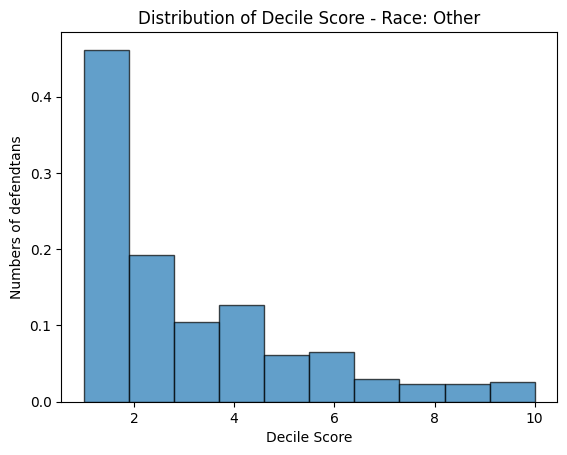

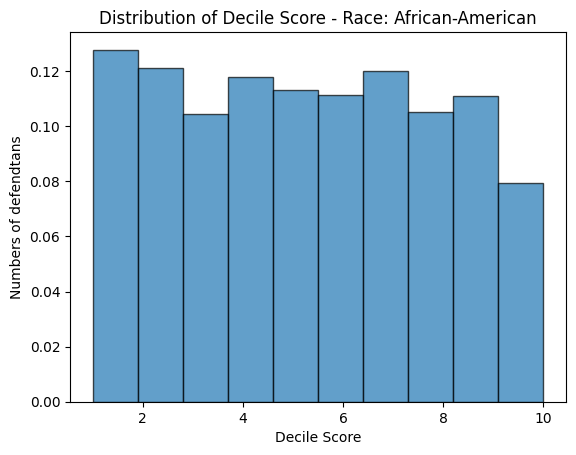

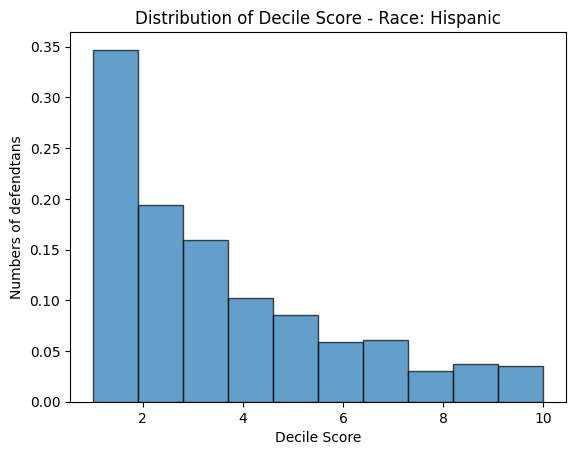

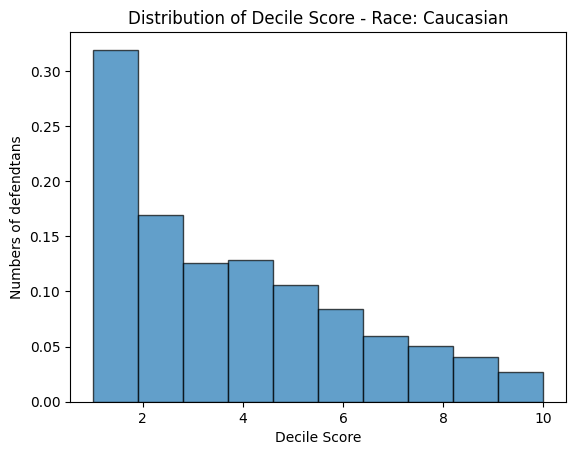

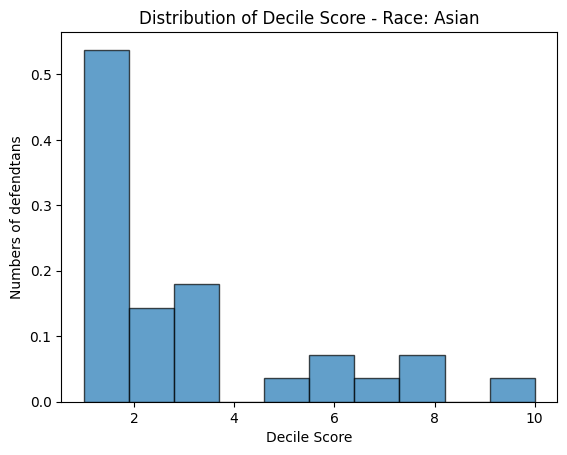

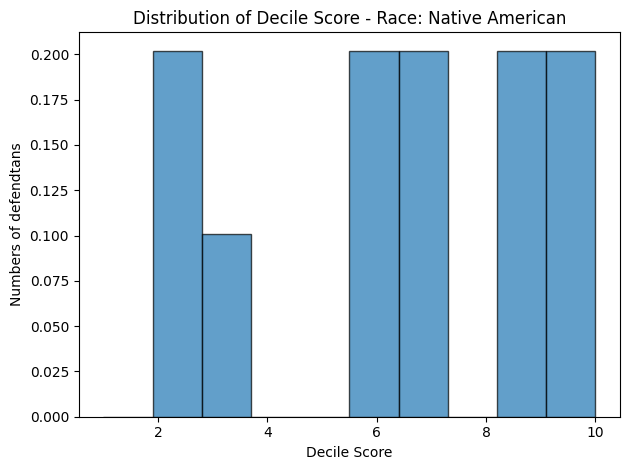

In [12]:
import matplotlib.pyplot as plt

race_categories = df['race'].unique()  # Get the unique race categories

# Create separate plots for each race category
for i, race_category in enumerate(race_categories, start=1):
    # Filter the data for the current race category
    filtered_data = df[df['race'] == race_category]
    
    # Create a new plot
    plt.figure(i)
    
    # Plot the histogram for the decile score column
    plt.hist(filtered_data['decile_score'], bins=10, range=(1, 10), alpha=0.7, density=True, edgecolor='black')
    
    # Add labels and title
    plt.xlabel('Decile Score')
    plt.ylabel('Numbers of defendtans')
    plt.title(f'Distribution of Decile Score - Race: {race_category}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

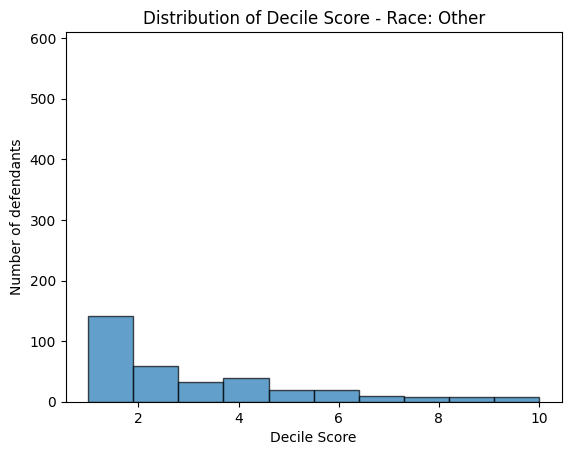

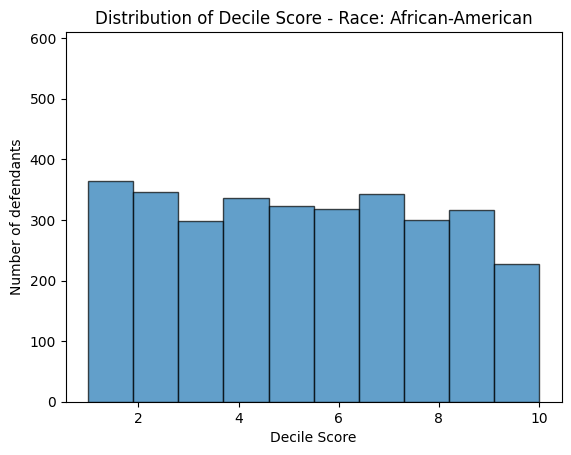

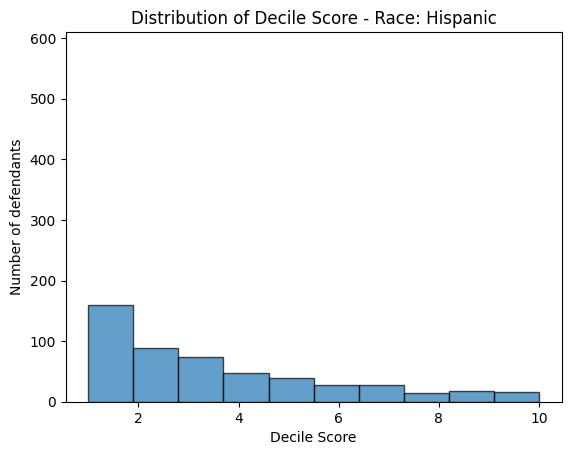

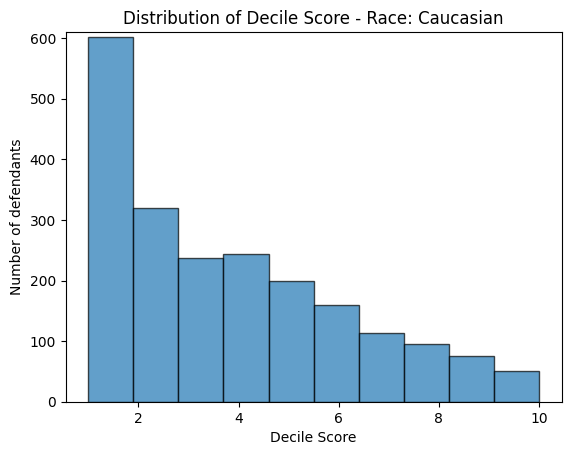

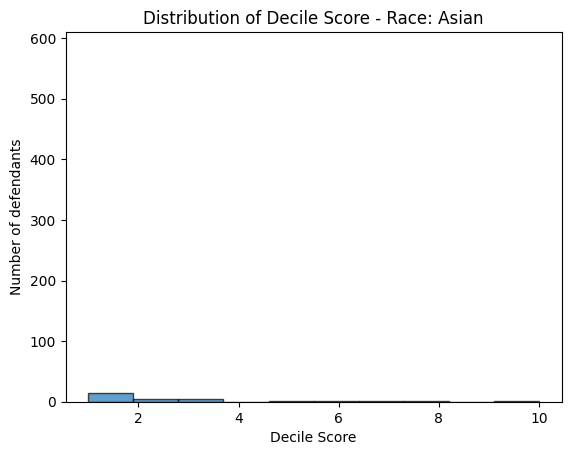

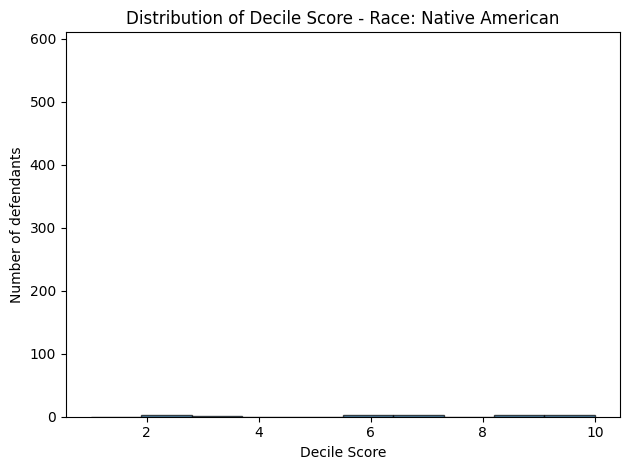

In [27]:
import matplotlib.pyplot as plt

race_categories = df['race'].unique()  # Get the unique race categories

# Create separate plots for each race category
for i, race_category in enumerate(race_categories, start=1):
    # Filter the data for the current race category
    filtered_data = df[df['race'] == race_category]
    
    # Create a new plot
    plt.figure(i)
    
    # Plot the histogram for the decile score column
    plt.hist(filtered_data['decile_score'], bins=10, range=(1, 10), alpha=0.7, density=False, edgecolor='black')
    
    # Set a common y-axis limit for all subplots
    plt.ylim([0, 610])
    
    # Add labels and title
    plt.xlabel('Decile Score')
    plt.ylabel('Number of defendants')
    plt.title(f'Distribution of Decile Score - Race: {race_category}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


# Recidivism rate

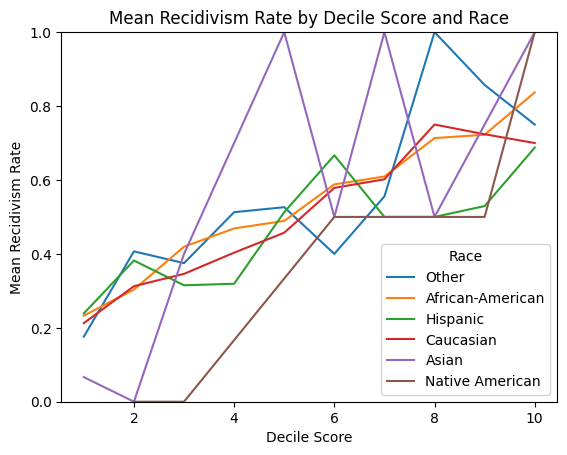

In [14]:
import matplotlib.pyplot as plt

# Group the data by decile score and race, and calculate the mean recidivism rate
grouped_data = df.groupby(['decile_score', 'race'])['two_year_recid'].mean().reset_index()

# Separate the data for each race category
race_categories = df['race'].unique()

# Create a plot for each race category
for race_category in race_categories:
    race_data = grouped_data[grouped_data['race'] == race_category]
    
    # Plot the mean recidivism rate for each decile score
    plt.plot(race_data['decile_score'], race_data['two_year_recid'], label=race_category)

# Add labels and title
plt.xlabel('Decile Score')
plt.ylabel('Mean Recidivism Rate')
plt.title('Mean Recidivism Rate by Decile Score and Race')

# Set the y-axis limits to 0 and 1
plt.ylim([0, 1])

# Add a legend
plt.legend(title='Race')

# Display the plot
plt.show()

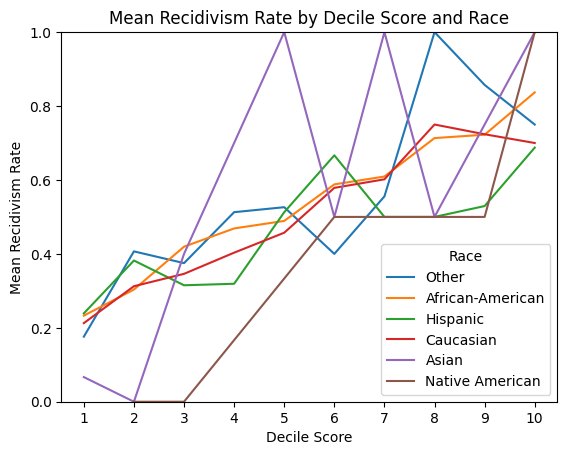

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Group the data by decile score and race, and calculate the mean recidivism rate
grouped_data = df.groupby(['decile_score', 'race'])['two_year_recid'].mean().reset_index()

# Separate the data for each race category
race_categories = df['race'].unique()

# Create a plot for each race category
for race_category in race_categories:
    race_data = grouped_data[grouped_data['race'] == race_category]
    
    # Plot the mean recidivism rate for each decile score
    plt.plot(race_data['decile_score'], race_data['two_year_recid'], label=race_category)

# Add labels and title
plt.xlabel('Decile Score')
plt.ylabel('Mean Recidivism Rate')
plt.title('Mean Recidivism Rate by Decile Score and Race')

# Set the x-axis ticks to every number from 1 to 10
plt.xticks(np.arange(1, 11))

# Set the y-axis limits to 0 and 1
plt.ylim([0, 1])

# Add a legend
plt.legend(title='Race')

# Display the plot
plt.show()


# Actual vs predicted outcome

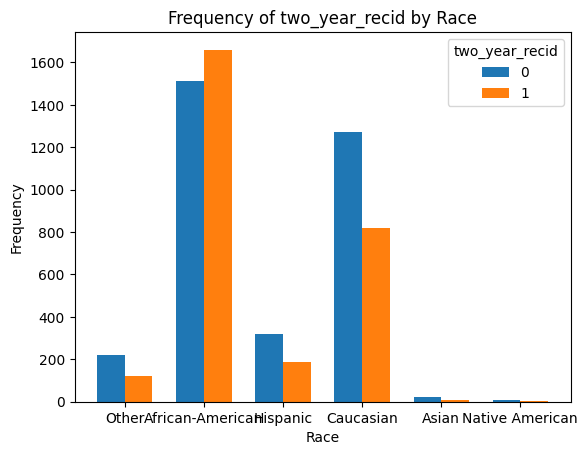

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Get the unique race categories
race_categories = df['race'].unique()

# Calculate the frequencies of '0' and '1' for each race category
freq_0 = []
freq_1 = []

for race_category in race_categories:
    filtered_data = df[df['race'] == race_category]
    freq_0.append(filtered_data['two_year_recid'].value_counts()[0])
    freq_1.append(filtered_data['two_year_recid'].value_counts()[1])

# Create a bar plot with two stacks side by side for each race category
x = np.arange(len(race_categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, freq_0, width, label='0')
rects2 = ax.bar(x + width/2, freq_1, width, label='1')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Race')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of two_year_recid by Race')
ax.set_xticks(x)
ax.set_xticklabels(race_categories)
ax.legend(title='two_year_recid')

# Display the plot
plt.show()


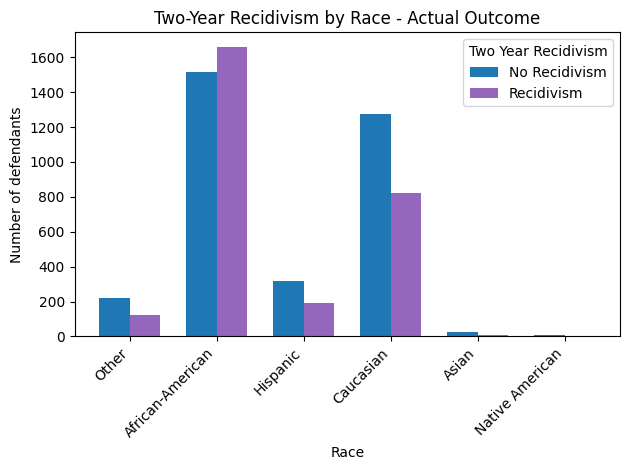

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Get the unique race categories
race_categories = df['race'].unique()

# Calculate the frequencies of '0' and '1' for each race category
freq_0 = []
freq_1 = []

for race_category in race_categories:
    filtered_data = df[df['race'] == race_category]
    freq_0.append(filtered_data['two_year_recid'].value_counts()[0])
    freq_1.append(filtered_data['two_year_recid'].value_counts()[1])

# Create a bar plot with two stacks side by side for each race category
x = np.arange(len(race_categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, freq_0, width, label='0', color='tab:blue')
rects2 = ax.bar(x + width/2, freq_1, width, label='1', color='tab:purple')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Race')
ax.set_ylabel('Number of defendants')
ax.set_title('Two-Year Recidivism by Race - Actual Outcome')
ax.set_xticks(x)
ax.set_xticklabels(race_categories, rotation=45, ha='right')

legend_labels = ['No Recidivism', 'Recidivism']
ax.legend(title='Two Year Recidivism', labels=legend_labels)

# Adjust the plot layout
fig.tight_layout()

# Display the plot
plt.show()

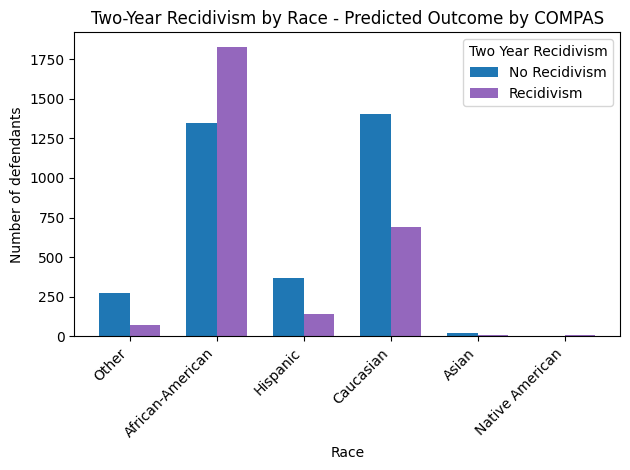

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get the unique race categories
race_categories = df['race'].unique()

# Calculate the frequencies of '0' and '1' for each race category
freq_0 = []
freq_1 = []

for race_category in race_categories:
    filtered_data = df[df['race'] == race_category]
    decile_score = filtered_data['decile_score'].values
    
    # Assign values of 0 or 1 based on the conditions
    assigned_values = np.where((decile_score) >= 5, 1, 0)
    
    freq_0.append(np.sum(assigned_values == 0))
    freq_1.append(np.sum(assigned_values == 1))

# Create a bar plot with two stacks side by side for each race category
x = np.arange(len(race_categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, freq_0, width, label='0', color='tab:blue')
rects2 = ax.bar(x + width/2, freq_1, width, label='1', color='tab:purple')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Race')
ax.set_ylabel('Number of defendants')
ax.set_title('Two-Year Recidivism by Race - Predicted Outcome by COMPAS')
ax.set_xticks(x)
ax.set_xticklabels(race_categories, rotation=45, ha='right')

legend_labels = ['No Recidivism', 'Recidivism']
ax.legend(title='Two Year Recidivism', labels=legend_labels)

# Adjust the plot layout
fig.tight_layout()

# Display the plot
plt.show()


# Age against recidivims

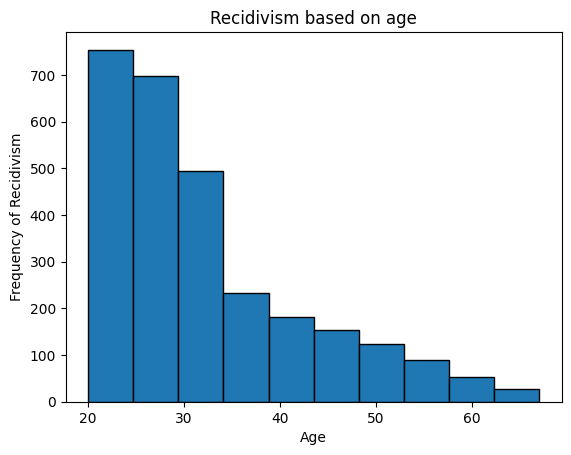

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'df' with 'age' and 'two_year_recid' columns
# Replace 'df' with the actual name of your DataFrame

# Filter the DataFrame to include only the records with recidivism (two_year_recid = 1)
recid_df = df[df['two_year_recid'] == 1]

# Plot the histogram
plt.hist(recid_df['age'], bins=10, edgecolor='black')

# Set the plot title and axis labels
plt.title('Recidivism based on age')
plt.xlabel('Age')
plt.ylabel('Frequency of Recidivism')

# Display the plot
plt.show()

In [1]:
from prettytable import PrettyTable

# Create a table object
table = PrettyTable()

# Add column names
table.field_names = ['Hyperparameter', 'Default Value']

# Add rows with hyperparameters and their default values
table.add_row(['n_estimators', 1000])
table.add_row(['criterion', 'mse'])
table.add_row(['max_depth', 'None'])
table.add_row(['min_samples_split', 2])
table.add_row(['min_samples_leaf', 1])
table.add_row(['max_features', 'auto'])
table.add_row(['bootstrap', True])
table.add_row(['random_state', 42])

# Set the alignment of the columns
table.align['Hyperparameter'] = 'l'
table.align['Default Value'] = 'l'

# Print the table
print(table)


+-------------------+---------------+
| Hyperparameter    | Default Value |
+-------------------+---------------+
| n_estimators      | 1000          |
| criterion         | mse           |
| max_depth         | None          |
| min_samples_split | 2             |
| min_samples_leaf  | 1             |
| max_features      | auto          |
| bootstrap         | True          |
| random_state      | 42            |
+-------------------+---------------+


In [10]:
!pip install prettytable


In [2]:
from tabulate import tabulate

# Create a list of lists containing the hyperparameter values
hyperparameters = [
    ["n_estimators", 1000],
    ["criterion", "mse"],
    ["max_depth", None],
    ["min_samples_split", 2],
    ["min_samples_leaf", 1],
    ["max_features", "auto"],
    ["bootstrap", True],
    ["random_state", None]
]

# Define the table headers
headers = ["Hyperparameter", "Default Value"]

# Generate the table
table = tabulate(hyperparameters, headers, tablefmt="grid")

# Print the table
print(table)


+-------------------+-----------------+
| Hyperparameter    | Default Value   |
+===================+=================+
| n_estimators      | 1000            |
+-------------------+-----------------+
| criterion         | mse             |
+-------------------+-----------------+
| max_depth         |                 |
+-------------------+-----------------+
| min_samples_split | 2               |
+-------------------+-----------------+
| min_samples_leaf  | 1               |
+-------------------+-----------------+
| max_features      | auto            |
+-------------------+-----------------+
| bootstrap         | True            |
+-------------------+-----------------+
| random_state      |                 |
+-------------------+-----------------+
